In [1]:
from google.colab import drive
drive.mount('/content/gdirve/')

%cd /content/gdirve/My Drive/colour_transferring/DSW_colortransfer

Mounted at /content/gdirve/
/content/gdirve/My Drive/colour_transferring/DSW_colortransfer


In [2]:
!pip install POT
!pip install git+https://github.com/geoopt/geoopt.git

     |████████████████████████████████| 440kB 8.8MB/s 
  Cloning https://github.com/geoopt/geoopt.git to /tmp/pip-req-build-z8v9l8km
  Running command git clone -q https://github.com/geoopt/geoopt.git /tmp/pip-req-build-z8v9l8km
  Created wheel for geoopt: filename=geoopt-0.3.1-cp37-none-any.whl size=76194 sha256=fe10d22b4e5aa98d7271376c5daae65e085deb0b0945ebc9de59e7fd95cfe851
  Stored in directory: /tmp/pip-ephem-wheel-cache-62h8uf8w/wheels/10/df/30/e0d857f034c142ca5f38af048b62aae3da773b272553e5dd21
Successfully built geoopt


In [3]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import io, img_as_ubyte
from skimage.transform import resize
import ot

from sklearn import cluster

from tqdm import tqdm

import sys
import torch

import time
from utils import *

In [22]:
np.random.seed(1)
torch.manual_seed(1)
n_clusters = 3000
name1='source_flowers.bmp'#path to images 1
name2='parrots.bmp'#path to images 2
source = img_as_ubyte(io.imread(name1))
target = img_as_ubyte(io.imread(name2))
reshaped_target = img_as_ubyte(resize(target, source.shape[:2]))
#MODE=SW,SSW,MSSW,PSSW,MPSSW,MaxSW,DSW
n1=10
n2=100
mode='combo1'

In [23]:
if(mode=='cluster'):
    X = source.reshape((-1, 3))  # We need an (n_sample, n_feature) array
    source_k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters, n_init=4, batch_size=100)
    source_k_means.fit(X)
    source_values = source_k_means.cluster_centers_.squeeze()
    source_labels = source_k_means.labels_

    # create an array from labels and values
    #source_compressed = np.choose(labels, values)
    source_compressed = source_values[source_labels]
    source_compressed.shape = source.shape

    vmin = source.min()
    vmax = source.max()

    # original image
    plt.figure(1, figsize=(5, 5))
    plt.title("Original Source")
    plt.imshow(source,  vmin=vmin, vmax=256)

    # compressed image
    plt.figure(2, figsize=(5, 5))
    plt.title("Compressed Source")
    plt.imshow(source_compressed.astype('uint8'),  vmin=vmin, vmax=vmax)
    with open('npzfiles/'+name1+'source_compressed.npy', 'wb') as f:
        np.save(f, source_compressed)
    with open('npzfiles/'+name1+'source_values.npy', 'wb') as f:
        np.save(f, source_values)
    with open('npzfiles/'+name1+'source_labels.npy', 'wb') as f:
        np.save(f, source_labels)
    np.random.seed(0)

    X = target.reshape((-1, 3))  # We need an (n_sample, n_feature) array
    target_k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters, n_init=4, batch_size=100)
    target_k_means.fit(X)
    target_values = target_k_means.cluster_centers_.squeeze()
    target_labels = target_k_means.labels_

    # create an array from labels and values
    target_compressed = target_values[target_labels]
    target_compressed.shape = target.shape

    vmin = target.min()
    vmax = target.max()

    # original image
    plt.figure(3, figsize=(5, 5))
    plt.title("Original Target")
    plt.imshow(target,  vmin=vmin, vmax=256)

    # compressed image
    plt.figure(4, figsize=(5, 5))
    plt.title("Compressed Target")
    plt.imshow(target_compressed.astype('uint8'),  vmin=vmin, vmax=vmax)

    with open('npzfiles/'+name2+'target_compressed.npy', 'wb') as f:
        np.save(f, target_compressed)
    with open('npzfiles/'+name2+'target_values.npy', 'wb') as f:
        np.save(f, target_values)
    with open('npzfiles/'+name2+'target_labels.npy', 'wb') as f:
        np.save(f, target_labels)
else:
    with open('npzfiles/'+name1+'source_compressed.npy', 'rb') as f:
        source_compressed = np.load(f)
    with open('npzfiles/'+name2+'target_compressed.npy', 'rb') as f:
        target_compressed = np.load(f)
    with open('npzfiles/'+name1+'source_values.npy', 'rb') as f:
        source_values = np.load(f)
    with open('npzfiles/'+name2+'target_values.npy', 'rb') as f:
        target_values = np.load(f)
    with open('npzfiles/'+name1+'source_labels.npy', 'rb') as f:
        source_labels = np.load(f)
    with open('npzfiles/'+name2+'target_labels.npy', 'rb') as f:
        target_labels = np.load(f)

In [ ]:
mode='combo1'

95.9660415649414 12.341547012329102
114.27426147460938 18.76934814453125
Distance: 962.4225463867188
95.9660415649414 12.3522310256958
114.27426147460938 18.7808780670166
Distance: 949.6779174804688
95.9660415649414 12.354142189025879
114.27426147460938 18.781770706176758
Distance: 1037.98486328125
95.9660415649414 12.356344223022461
114.27426147460938 18.78386878967285
Distance: 1095.1214599609375
95.9660415649414 12.355481147766113
114.27426147460938 18.782718658447266
Distance: 1111.5684814453125
95.9660415649414 12.362068176269531
114.27426147460938 18.791271209716797
Distance: 1162.1290283203125
95.9660415649414 12.36825180053711
114.27426147460938 18.798486709594727
Distance: 1076.1888427734375
95.9660415649414 12.370818138122559
114.27426147460938 18.80207061767578
Distance: 960.2182006835938
95.9660415649414 12.37031364440918
114.27426147460938 18.802350997924805
Distance: 910.4071044921875
95.9660415649414 12.368160247802734
114.27426147460938 18.7991943359375
Distance: 871.70

<Figure size 1800x324 with 0 Axes>

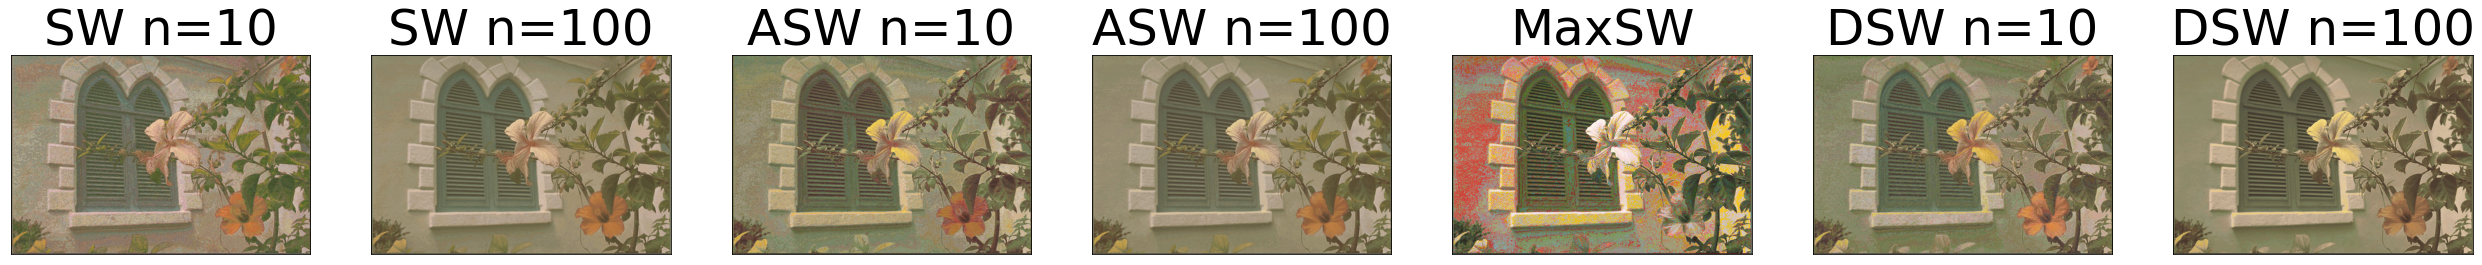

In [24]:
fontsize=50
if(mode=='SW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))
    print(source_values.shape)
    print(target_values.shape)
    print(source.shape)
    ax[0].imshow(source)
    ax[1].imshow(transform_SW(source_values,target_values,source_labels,source,n=n1))
    ax[2].imshow(transform_SW(source_values,target_values,source_labels,source,n=n2))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('SW n='+str(n1), fontsize=fontsize)
    ax[2].set_title('SW n='+str(n2), fontsize=fontsize)
    ax[3].set_title('Target', fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/SW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
#MAX
elif(mode=='MaxSW'):
    f, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_maxSW(source_values,target_values,source_labels,source))
    ax[2].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('Max-SW', fontsize=fontsize)
    ax[2].set_title('Target', fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/MaxSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
#DSW

elif(mode=='DSW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_DSW(source_values,target_values,source_labels,source,n=n1))
    ax[2].imshow(transform_DSW(source_values,target_values,source_labels,source,n=n2))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('DSW n='+str(n1), fontsize=fontsize)
    ax[2].set_title('DSW n='+str(n2), fontsize=fontsize)
    ax[3].set_title('Target', fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/DSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
elif(mode=='ASW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_ASW(source_values,target_values,source_labels,source,n=n2))
    ax[2].imshow(transform_ASW(source_values,target_values,source_labels,source,n=n2))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('ASW n='+str(n2), fontsize=fontsize)
    ax[2].set_title('ASW n='+str(n2), fontsize=fontsize)
    ax[3].set_title('Target', fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/ASW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
elif(mode=='combo1'):
    f, ax = plt.subplots(1, 2, figsize=(25,4.5))
    ax[0].imshow(source)
    ax[1].imshow(reshaped_target)
    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('Target', fontsize=fontsize)
    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)
    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/'+name1+'_to_'+name2+'.pdf')
    # plt.show()
    plt.clf()
#########
    f, ax = plt.subplots(1, 7, figsize=(35, 6.3))

    ax[0].imshow(transform_SW(source_values, target_values, source_labels, source, n=n1))
    ax[1].imshow(transform_SW(source_values, target_values, source_labels, source, n=n2))
    ax[2].imshow(transform_ASW(source_values, target_values, source_labels, source, n=n1,lam=0.))
    ax[3].imshow(transform_ASW(source_values, target_values, source_labels, source, n=100,lam=0.))
    ax[4].imshow(transform_maxSW(source_values,target_values,source_labels,source))
    ax[5].imshow(transform_DSW(source_values, target_values, source_labels, source, n=n1))
    ax[6].imshow(transform_DSW(source_values, target_values, source_labels, source, n=n2))

    ax[0].set_title('SW n=' + str(n1), fontsize=fontsize)
    ax[1].set_title('SW n=' + str(n2), fontsize=fontsize)
    ax[2].set_title('ASW n=' + str(n1), fontsize=fontsize)
    ax[3].set_title('ASW n=' + str(n2), fontsize=fontsize)
    ax[4].set_title('MaxSW', fontsize=fontsize)
    ax[5].set_title('DSW n=' + str(n1), fontsize=fontsize)
    ax[6].set_title('DSW n=' + str(n2), fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)
    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/combo1_' + name1 + '_to_' + name2 + '.pdf')
    plt.show()
elif(mode=='drSW'):
    f, ax = plt.subplots(1, 4, figsize=(15, 3.5))
    ax[0].imshow(source)
    ax[1].imshow(transform_drSW(source_values,target_values,source_labels,source))
    ax[2].imshow(transform_saveSW(source_values, target_values, source_labels, source))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=fontsize)
    ax[1].set_title('drSW', fontsize=fontsize)
    ax[2].set_title('saveSW', fontsize=fontsize)
    ax[3].set_title('Target', fontsize=fontsize)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/drSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()

In [ ]:
M = ot.dist(source_values, target_values)
a=np.ones(source_values.shape[0])
b=np.ones(target_values.shape[0])

In [ ]:
W = ot.emd(a, b, M)

/usr/local/lib/python3.7/dist-packages/ot/lp/__init__.py:276: UserWarning: numItermax reached before optimality. Try to increase numItermax.
  result_code_string = check_result(result_code)


In [ ]:
np.matmul(W.T,source_values)

array([[126., 141., 180.],
       [113., 130., 138.],
       [174., 172., 194.],
       ...,
       [ 70.,  63.,  57.],
       [ 63.,  64.,  58.],
       [ 64.,  65.,  83.]])

In [ ]:
transform_WD=np.matmul(W,target_values)[source_labels].reshape(source.shape)

In [ ]:
transform_WD_reverse=np.matmul(W.T,source_values)[target_labels].reshape(target.shape)

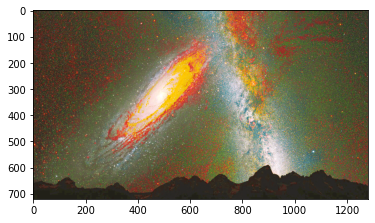

In [ ]:
plt.imshow(transform_WD.astype('uint8'))

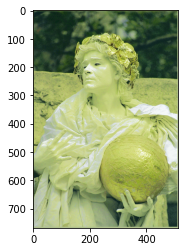

In [ ]:
plt.imshow(transform_WD_reverse.astype('uint8'))

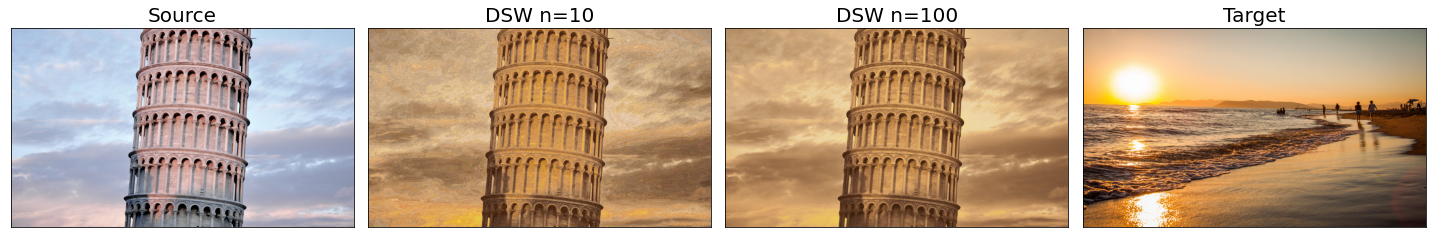

In [ ]:
mode='DSW'
if(mode=='SW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))
    print(source_values.shape)
    print(target_values.shape)
    print(source.shape)
    ax[0].imshow(source)
    ax[1].imshow(transform_SW(source_values,target_values,source_labels,source,n=n1))
    ax[2].imshow(transform_SW(source_values,target_values,source_labels,source,n=n2))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('SW n='+str(n1), fontsize=20)
    ax[2].set_title('SW n='+str(n2), fontsize=20)
    ax[3].set_title('Target', fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/SW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
#MAX
elif(mode=='MaxSW'):
    f, ax = plt.subplots(1, 3, figsize=(15, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_maxSW(source_values,target_values,source_labels,source))
    ax[2].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('Max-SW', fontsize=20)
    ax[2].set_title('Target', fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/MaxSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
#DSW

elif(mode=='DSW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_DSW(source_values,target_values,source_labels,source,n=n1))
    ax[2].imshow(transform_DSW(source_values,target_values,source_labels,source,n=10000))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('DSW n='+str(n1), fontsize=20)
    ax[2].set_title('DSW n='+str(n2), fontsize=20)
    ax[3].set_title('Target', fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/DSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
elif(mode=='ASW'):
    f, ax = plt.subplots(1, 4, figsize=(20, 5))

    ax[0].imshow(source)
    ax[1].imshow(transform_ASW(source_values,target_values,source_labels,source,n=n1))
    ax[2].imshow(transform_ASW(source_values,target_values,source_labels,source,n=n2))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('ASW n='+str(n1), fontsize=20)
    ax[2].set_title('ASW n='+str(n2), fontsize=20)
    ax[3].set_title('Target', fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/ASW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()
elif(mode=='combo1'):
    f, ax = plt.subplots(1, 2, figsize=(25,4.5))
    ax[0].imshow(source)
    ax[1].imshow(reshaped_target)
    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('Target', fontsize=20)
    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)
    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/'+name1+'_to_'+name2+'.pdf')
    # plt.show()
    plt.clf()
#########
    f, ax = plt.subplots(1, 5, figsize=(25, 4.5))

    ax[0].imshow(transform_SW(source_values, target_values, source_labels, source, n=n1))
    ax[1].imshow(transform_SW(source_values, target_values, source_labels, source, n=n2))
    ax[2].imshow(transform_maxSW(source_values,target_values,source_labels,source))
    ax[3].imshow(transform_DSW(source_values, target_values, source_labels, source, n=n1))
    ax[4].imshow(transform_DSW(source_values, target_values, source_labels, source, n=n2))

    ax[0].set_title('SW n=' + str(n1), fontsize=20)
    ax[1].set_title('SW n=' + str(n2), fontsize=20)
    ax[2].set_title('MaxSW', fontsize=20)
    ax[3].set_title('DSW n=' + str(n1), fontsize=20)
    ax[4].set_title('DSW n=' + str(n2), fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)
    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/combo1_' + name1 + '_to_' + name2 + '.pdf')
    plt.show()
elif(mode=='drSW'):
    f, ax = plt.subplots(1, 4, figsize=(15, 3.5))
    ax[0].imshow(source)
    ax[1].imshow(transform_drSW(source_values,target_values,source_labels,source))
    ax[2].imshow(transform_saveSW(source_values, target_values, source_labels, source))
    ax[3].imshow(reshaped_target)

    ax[0].set_title('Source', fontsize=20)
    ax[1].set_title('drSW', fontsize=20)
    ax[2].set_title('saveSW', fontsize=20)
    ax[3].set_title('Target', fontsize=20)

    for axis in ax:
        axis.get_yaxis().set_visible(False)
        axis.get_xaxis().set_visible(False)

    f.patch.set_alpha(0)
    plt.tight_layout()
    plt.savefig('transferimages/drSW_transfer_'+name1+'_to_'+name2+'.pdf')
    plt.show()

In [ ]:
source.shape

(768, 512, 3)

In [ ]:
source_compressed.shape=(768,512,3)

In [ ]:
source_labels.shape

(393216,)